Import

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [2]:
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)

In [3]:





x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

Train the Gradient Boosting model

In [4]:
pipe = Pipeline([('gradientBoost', GradientBoostingClassifier())])
pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)


Calculate the accuracy of the model

In [5]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.9311531841652324


Calculate the classification report of the model

classification_report 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      2295
           1       0.89      0.93      0.91      4514

    accuracy                           0.88      6809
   macro avg       0.87      0.85      0.86      6809
weighted avg       0.88      0.88      0.88      6809




Training Accuracy score: 0.9543300301594141
Testing Accuracy score: 0.9311531841652324
classification_report 
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       244
         1.0       0.93      0.96      0.94       337

    accuracy                           0.93       581
   macro avg       0.93      0.93      0.93       581
weighted avg       0.93      0.93      0.93       581



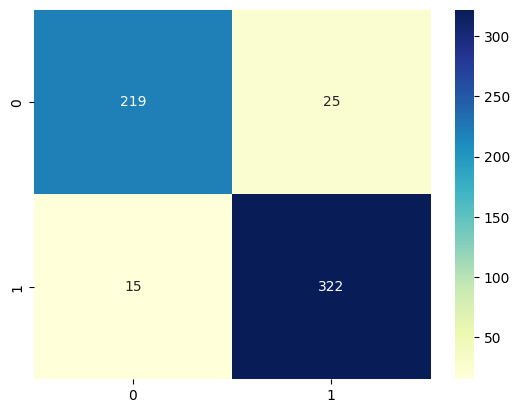

In [6]:

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm
                        )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
